# 데이터 프레임 변경(1)

In [ ]:
# 라이브러리 추가

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config Inllinebackend.figure_format = 'retina'

In [ ]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips(2).csv'
tip =  pd.read_csv(path)

# 확인
tip.head()

$ $ 

$ $

# 1. 열 이름 변경

- 열 이름을 적절히 변경해야 할 때가 있음

##### 1) 일부 열 이름 변경
    - rename() 메소드를 이용해 변경 전후의 열 이름을 딕셔너리 형태로 나열.
    - inplace=True 옵션으로 값을 반영

In [ ]:
 # 다음과 같이 열 이름을 변경합니다.
 #    - total_bill_amount → total_bill
 #    - male_female → sex
 #    - smoke_yes_no → smoker
 #    - week_name → day
 #    - dinner_lunch → time

In [ ]:
# rename()메소드로 열 이름 변경
# tip.rename(columns={}, inplace=True)
# 열 이름을 변경하기에 columns={} 필수.
tip.rename(columns={'total_bill_amount' : 'total_bill',
                    'male_female':'sex',
                    'smoke_yes_no' : 'smoker',
                    'week_name' : 'day',
                    'dinner_lunch' : 'time'}, inplace=True)

# 확인
tip.head()

##### 2) 모든 열 이름 변경
    - columns = 로 변경. 
    - 모든 열 이름을 나열해야 하기에 리스트 사용

In [ ]:
# .columns()
tip.columns = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']
tip.head()


$ $

$ $

# 2. 열 추가

##### 1) 열 추가
- total_bill에 tip을 더한 값을 갖는 final_amt 열을 추가합니다.

In [ ]:
# final_amt 열 추가: final_amt = total_bill + tip
tip['final_amt'] = tip['total_bill'] + tip['tip']
tip.head()

In [ ]:
# 딕셔너리의 특징 --> 해당 변수가 없으면 추가하고, 있으면 변경

- insert() 메소드를 사용하면 원하는 위치에 열을 추가할 수 있습니다.

In [ ]:
# tip 열 앞에 div_tb 열 추가: div_tb = total_bill / size
# 2번째 자리에 넣는 것 = 1, 1번째 자리에 넣는 것 = 0

tip.insert(1, 'div_tb', tip['total_bill'] / tip['size'])
tip.head()

$ $

$ $

# 3. 열 삭제

##### 1) 열 하나 삭제
- **drop()** 메소드를 사용해 열을 삭제합니다.
- axis=0: 행 삭제(기본 값) 
- axis=1: 열 삭제
- **inplace=True** 옵션을 지정해야 실제로 반영이 됩니다.

In [ ]:
########  삭제는 다시 실행시킬 수 없으므로 조심   ##############333

In [ ]:
# 열 하나 삭제: final_amt
tip.drop('final_amt', axis=1, inplace=True)

# 확인
tip.head()

##### 2) 여러 열 삭제

In [ ]:
# 열 두 개 삭제: div_tb, day
#tip.drop([?,?], axis=?, inplace=True)
tip.drop(['day','div_tb'], axis=1, inplace=True)

# 확인
tip.head()

In [ ]:
# # 1, 2, 3 인덱스의 행 삭제  ## 행을 삭제하는 거라 잘 사용x
# row_x = ['div_tb', 'day']
# tip.drop(row_x, axis=0, inplace=True)

# # 확인
# tip.head()

$ $
  
  $ $

# 4. 범주값 변경

##### 1) 범주값 변경  .map()

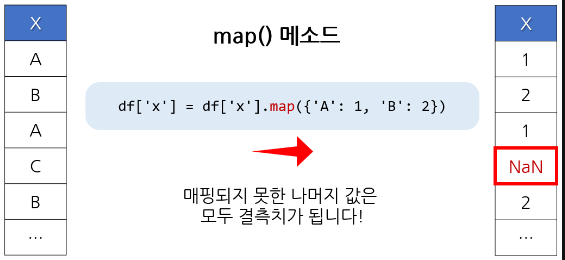

In [ ]:
# Male -> 1, Female -> 0
tip['sex'] = tip['sex'].map({'Male':1, 'Female':0})
tip.head()

# 두 번 돌리게 되면 Male -> 1로 이미 바껴서, Male이 없기에 결측치로 바뀜

##### 2) 범주값 변경  .replace()

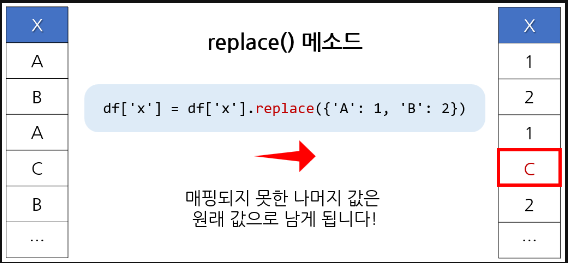

In [ ]:
# 1 --> Male,  0 --> Female
tip['sex'] = tip['sex'].replace({1:'Male', 0:'Female'})


# 확인
tip.head()

$ $

$ $

# 5. 범주값 만들기

- 연속값을 구간을 나누어 범주값으로 표현하는 과정을 **이산화(Discretization)**라고 합니다.
- **cut(), qcut()** 함수를 사용하여 쉽게 이산화 과정을 수행할 수 있습니다.
- 연속값을 이산화 함으로써 더 심도있는 데이터 분석이 가능해집니다.
- 예를 들어 점수를 일정 구간으로 구분하면 점수 구간별 분석이 가능해집니다.
- 또한 데이터가 단순해져 머신러닝 학습 과정과, 모델 성능이 향상될 수 있습니다.

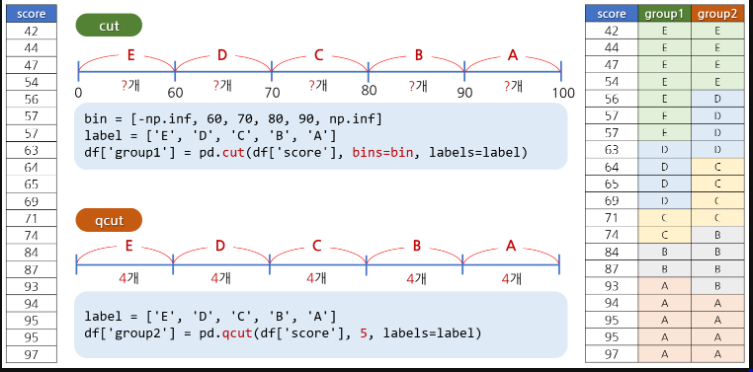

##### 1) cut()함수
- **크기**를 기준으로 구간을 나누고 싶을 때 **cut() 함수**를 사용합니다.
- 범위 개수를 지정하면 자동으로 크기를 기준으로 나눕니다.

In [ ]:
# tip 크기를 기준으로 4구간(a ~ d)으로 나누기
tip['tip_grp'] = pd.cut(tip['tip'], 4, labels=list('abcd'))
tip.head()

In [ ]:
# 범주값 확인
tip['tip_grp'].value_counts()

## cut으로 구간을 나누면 구간을 지정한 것으로 배정되는 값이 동일x


- 다음 구문은 아래 범위에 따른 값을 갖는 tip_grp 열을 추가합니다.
  - 2.0 이하 → 'a'
  - 2.0 초과 2.9 이하 → 'b'
  - 2.0 초과 3.5625 이하 → 'c'
  - 3.5625 초과 10.0 이하 → 'd' 
- 음의 무한대는 -np.inf, 양의 무한대는 np.inf로 지정합니다.

In [ ]:
# 등급 구하기  --> 4분위수로 범위를 구함
# bin의 구간 갯수와 label의 갯수가 같아야 함!!!!
bin = [-np.inf, 2.0, 2.9, 3.5625, np.inf]
label = ['a', 'b', 'c', 'd']
tip['tip_grp'] = pd.cut(tip['tip'], bins=bin, labels=label)

# 확인
tip['tip_grp'].value_counts()

In [ ]:
# 사분위수 
q1 = tip['total_bill'].describe()['25%']
q2 = tip['total_bill'].describe()['50%']
q3 = tip['total_bill'].describe()['75%']

print(q1, q2, q3)

$ $

##### 2) qcut() 함수

- **개수**를 기준으로 구간을 나누고 싶을 때 **qcut() 함수**를 사용합니다.
- 구간 개수를 지정하면 자동으로 **동일한 개수**를 갖는 구간이 만들어집니다.
- 위 연습문제는 total_bill 열의 사분위 값을 기준으로 cut() 함수를 사용해 범위를 나누었습니다.
- 사분위는 값 개수를 기준으로 4분의 1씩 데이터를 갖는 4개 구간을 만든 것입니다.
- 그러므로 qcut() 함수를 사용해 4개 구간으로 나누면 같은 결과를 얻게 됩니다.

In [ ]:
# 변수 설정
label = ['a', 'b', 'c', 'd']

# 같은 개수의 total_bill을 갖는 4개 구간으로 나누기
tip['bill_grp2'] = pd.qcut(tip['total_bill'], 4, labels=label)

# 확인
tip.head()


# 구간별 평균
tip_mean = tip.groupby('bill_grp2', as_index=False)[['total_bill', 'tip']].mean()

# 확인
tip_mean